<div align="right">

 ## *By S. Dame LO*

</div>

# **Predictions des ventes par un modèle de regression linéaire multiple**

Dans ce projet, nous allons analyser les données historiques de promotion marketing d’une entreprise. Chaque ligne correspond à une promotion marketing indépendante où l'entreprise utilise la télévision, les réseaux sociaux promotions dans les médias, la radio et les influenceurs pour augmenter les ventes. Il est demandé de trouver une variable unique qui prédit les ventes,et de trouver d'autres variables qui peuvent les aider à cibler leurs efforts de marketing. 
Pour répondre à la demande commerciale, j'effectuerez une analyse de régression linéaire multiple pour estimer les ventes à partir d’une combinaison de variables indépendantes.

# **Etape 1: Comprendre les données**


- **Aperçu des Données** 


| Colonne        | Type    | Description                                            | Valeurs possibles                  |
|----------------|---------|--------------------------------------------------------|------------------------------------|
| TV             | float64 | Budget  dépensé en promotions télévisées    | N/A                                |
| Radio          | float64 | Budget  dépensé en promotions radio          | N/A                                |
| Social_Media   | float64 | Budget  dépensé en promotions sur réseaux sociaux | N/A                            |
| Influencer     | object  | Type d'influenceur utilisé pour la promotion          | Mega, Micro, Nano, Macro           |
| Sales          | float64 | Ventes réalisées à la suite des promotions            | N/A                                |
| Tv             | object  | Catégorie de promotion télévisée                       | Low, Medium, High                  |


- **Objectif :** Estimer les ventes en fonction de plusieurs variables indépendantes.


# **Etape 2: Préparation des Données**

- **Charger les Packages**

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")


- **Charger les Données**

In [7]:
data=pd.read_csv(r"E:\_Learning\coursera\Google Advanced DATA ANALYST\C_5 Modeling\Data_5\marketing_sales_data.csv")

data.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


- **Inspecter les Données**

In [8]:
data.shape

(4572, 5)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [10]:
print(data.isna().sum())

print(data.isna().sum()/data.shape[0]*100)

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64
TV              0.218723
Radio           0.087489
Social Media    0.131234
Influencer      0.000000
Sales           0.131234
dtype: float64


Les avariables TV, Radio , Social Media et Sales contiennent des valeurs manquantes.\
Les lignes où il y a de valeurs manquantes seront supprimées car leur poids est très faible par rapport à la masse total des données.

In [11]:
data=data.dropna()

In [12]:
data.isna().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

In [13]:
data.duplicated().sum()

0

Il n'y a pas de redondance sur les entrées.

# **Etape 3: Analyse Exploratoire des Données (AED)**

- **Statistiques Descriptives**

In [14]:
data.describe()

,TV,Radio,Social Media,Sales
count,4546.000000,4546.000000,4546.000000,4546.000000
mean,54.062912,18.157533,3.323473,192.413332
std,26.104942,9.663260,2.211254,93.019873
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.555355,1.530822,112.434612
50%,53.000000,17.859513,3.055565,188.963678
75%,77.000000,25.640603,4.804919,272.324236
max,100.000000,48.871161,13.981662,364.079751


_**Interprétation**_

**TV** : La moyenne des dépenses en TV est de 54.06, avec un écart-type de 26.10, indiquant une variation significative.\
**Radio** : La moyenne est de 18.16, suggérant que les dépenses en radio sont généralement plus faibles que celles en TV.\
**Social Media**: Avec une moyenne de 3.32, les dépenses en réseaux sociaux sont les plus faibles parmi les trois canaux.\
**Sales**: Les ventes moyennes sont de 192.41, avec un écart-type de 93.02, ce qui indique une large dispersion des résultats de ventes.

- **Visualisations**

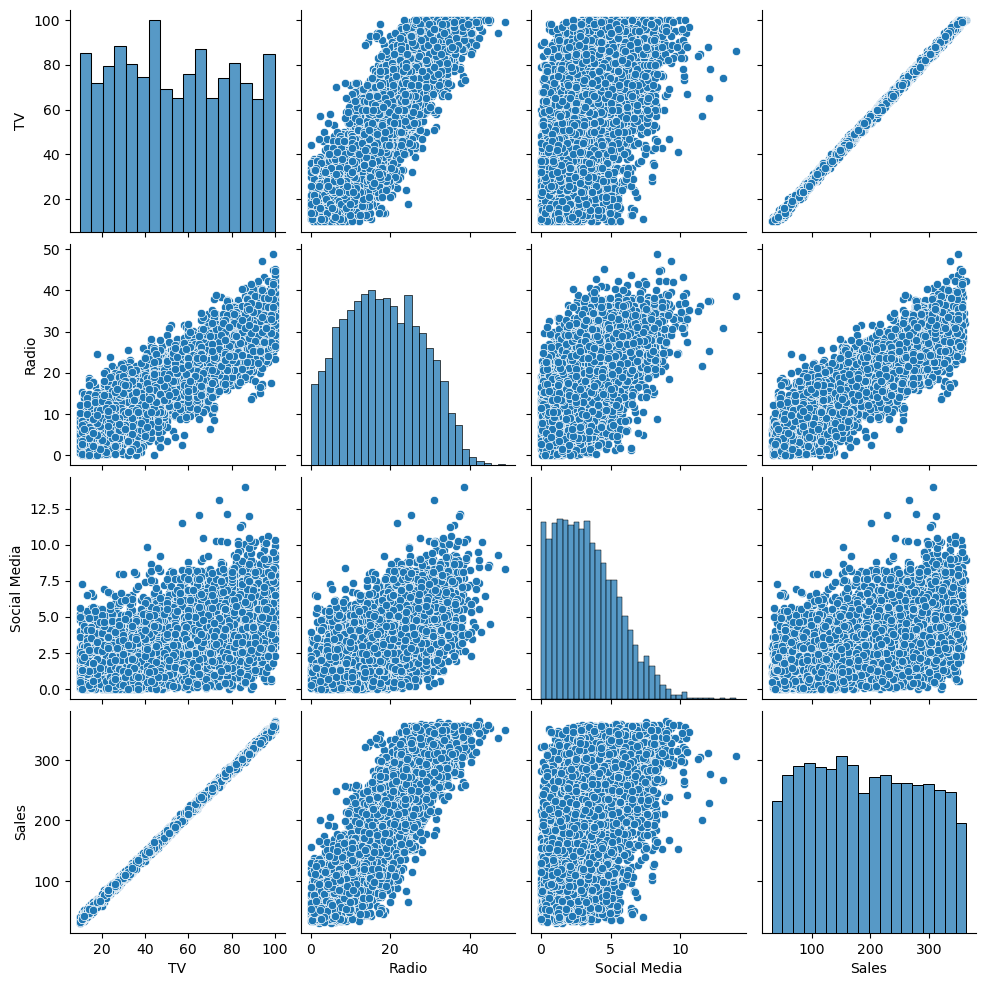

In [15]:
# pairplot of the data
sns.pairplot(data)


La radio et les réseaux sociaux semblent avoir des relations linéaires avec les ventes.La TV a une forte corrélation entre les ventes. Étant donné cela, ces variables pourraient être utiles en tant que variables indépendantes dans un modèle de régression linéaire multiple pour estimer les ventes.

<Axes: title={'center': 'Influencer vs Sales'}, xlabel='Influencer', ylabel='Sales'>

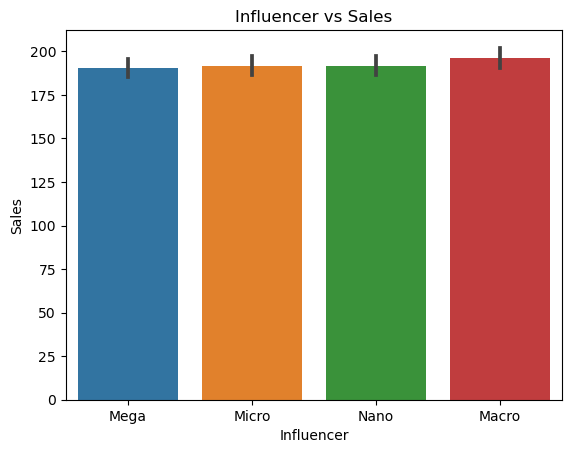

In [16]:
plt.title("Influencer vs Sales")
sns.barplot(data=data, x='Influencer', y='Sales')

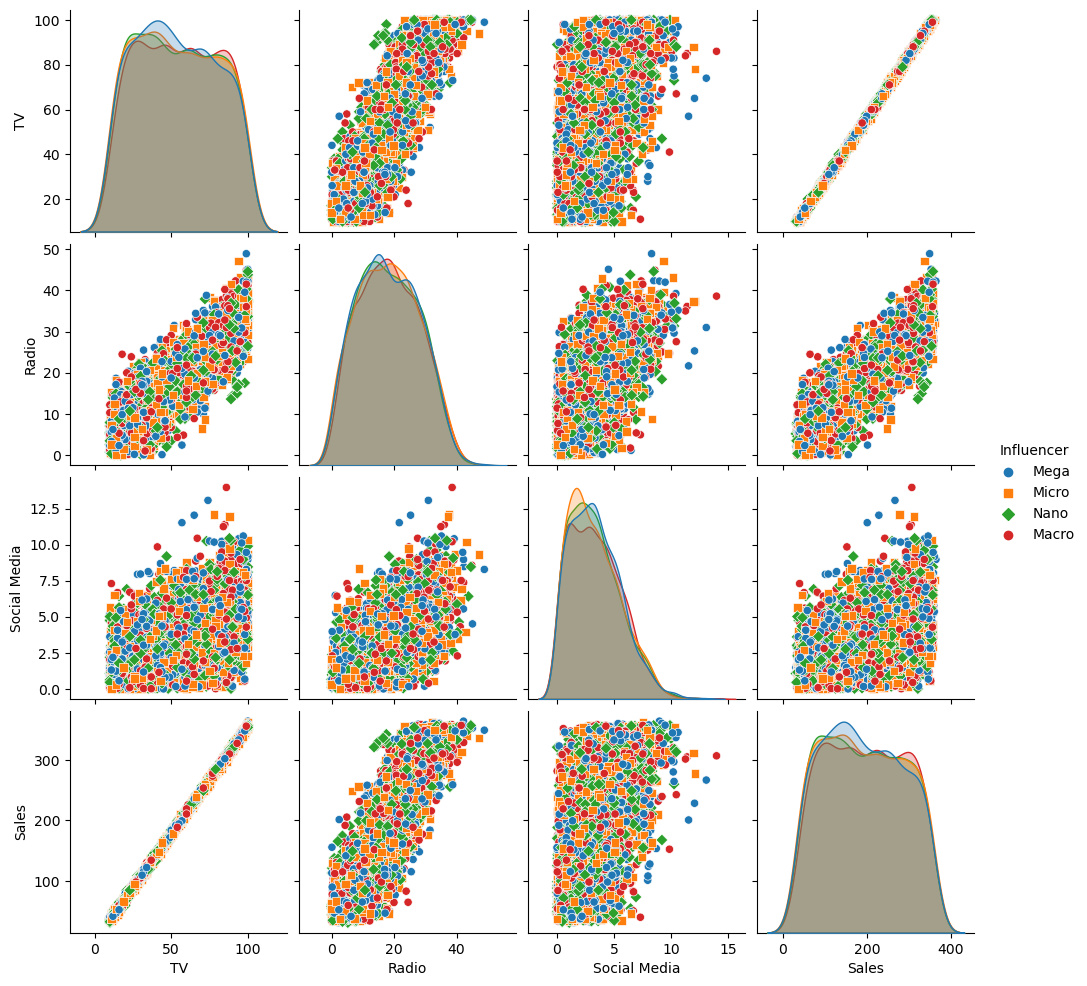

In [17]:
sns.pairplot(data, hue='Influencer', diag_kind='kde', markers=['o', 's', 'D'])
plt.show()

Il n'y a pas de différences significatives de ventes selon les types d'influenceurs.
Il semble que la variable "Influencer" n'a pas d'impact significatif sur les ventes.


In [18]:
# mean sales for each categorical variable
data.groupby("Influencer")['Sales'].mean()

Influencer
Macro    196.066150
Mega     190.412908
Micro    191.578370
Nano     191.708827
Name: Sales, dtype: float64

Les catégories d'influenceurs présentent peu de différences en termes de ventes moyennes, et la variation n'est pas substantielle. Cela suggère que l'influenceur pourrait être un prédicteur faible des ventes.

- **Feature Engineering**

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4546 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4546 non-null   float64
 1   Radio         4546 non-null   float64
 2   Social Media  4546 non-null   float64
 3   Influencer    4546 non-null   object 
 4   Sales         4546 non-null   float64
dtypes: float64(4), object(1)
memory usage: 213.1+ KB


In [20]:
data = data.rename(columns={'Social Media': 'Social_Media'})

Nous allons transformer la variable TV en variable catégorielle dans le but d'obtenir un modèle plus efficace. Pour cela, nous allons créer une nouvelle colonne Tv avec comme catégorie de dépenses : High, Médium et Low.

In [21]:
data['Tv']=data.Sales.apply([lambda x: 'Low' if 31 <= x <147.1 else 'Medium' if  147.1 <= x < 251.3 else 'High' ])

In [22]:
data.Tv.value_counts()

Tv
Low       1658
Medium    1479
High      1409
Name: count, dtype: int64

In [23]:
print(data.groupby(data.Tv)['Sales'].mean())

Tv
High      305.074628
Low        91.399255
Medium    198.323795
Name: Sales, dtype: float64


Il y a une différence remarquable entre les différentes catégories de Tv. Cela montre que la variable Tv à une influence significative sur la variable 'Sales'

In [24]:
data.head()

,TV,Radio,Social_Media,Influencer,Sales,Tv
0,16.0,6.566231,2.907983,Mega,54.732757,Low
1,13.0,9.237765,2.409567,Mega,46.677897,Low
2,41.0,15.886446,2.913410,Mega,150.177829,Medium
3,83.0,30.020028,6.922304,Mega,298.246340,High
4,15.0,8.437408,1.405998,Micro,56.594181,Low


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4546 entries, 0 to 4571
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4546 non-null   float64
 1   Radio         4546 non-null   float64
 2   Social_Media  4546 non-null   float64
 3   Influencer    4546 non-null   object 
 4   Sales         4546 non-null   float64
 5   Tv            4546 non-null   object 
dtypes: float64(4), object(2)
memory usage: 248.6+ KB


In [26]:
data.describe()

,TV,Radio,Social_Media,Sales
count,4546.000000,4546.000000,4546.000000,4546.000000
mean,54.062912,18.157533,3.323473,192.413332
std,26.104942,9.663260,2.211254,93.019873
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.555355,1.530822,112.434612
50%,53.000000,17.859513,3.055565,188.963678
75%,77.000000,25.640603,4.804919,272.324236
max,100.000000,48.871161,13.981662,364.079751


In [27]:
data.describe(include='object')

,Influencer,Tv
count,4546,4546
unique,4,3
top,Mega,Low
freq,1152,1658


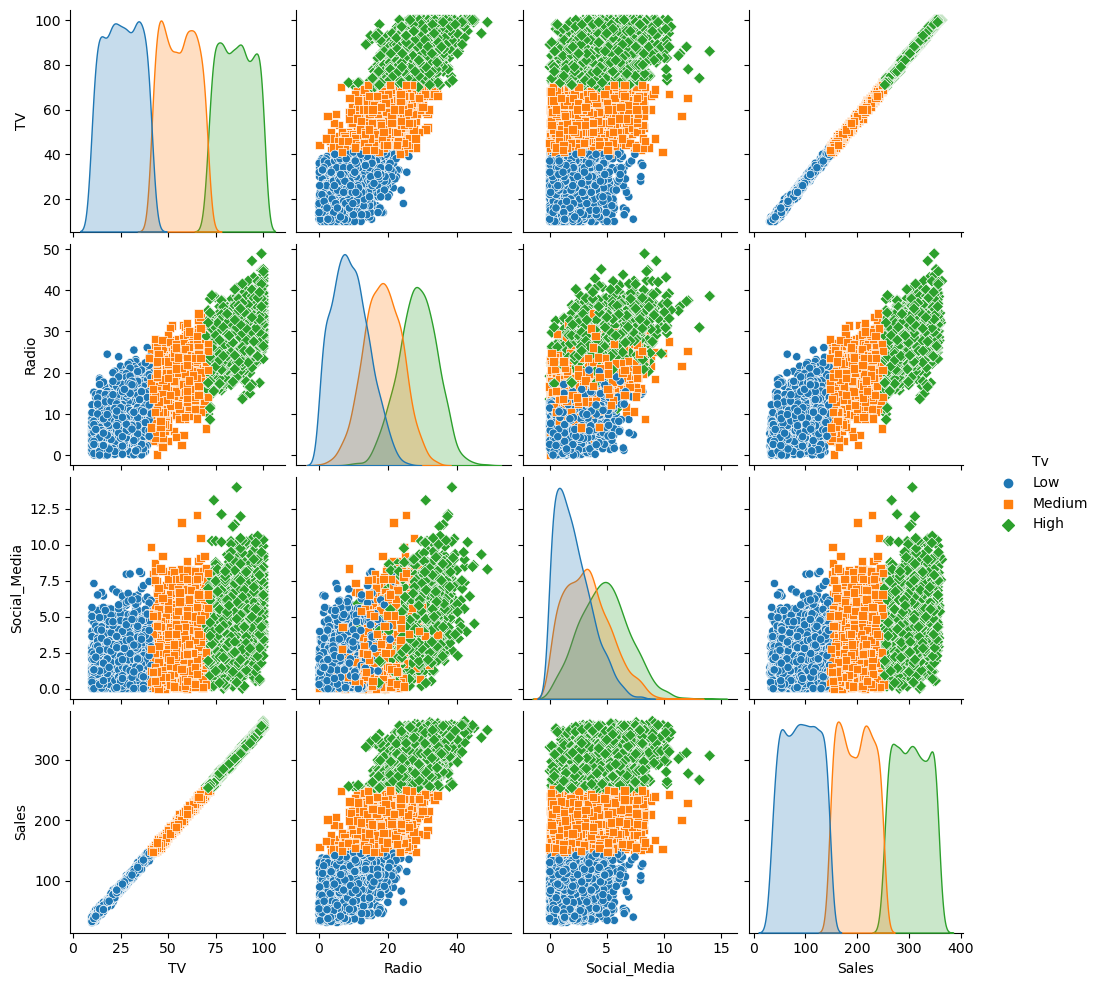

In [28]:
sns.pairplot(data, hue='Tv', diag_kind='kde', markers=['o', 's', 'D'])
plt.show()

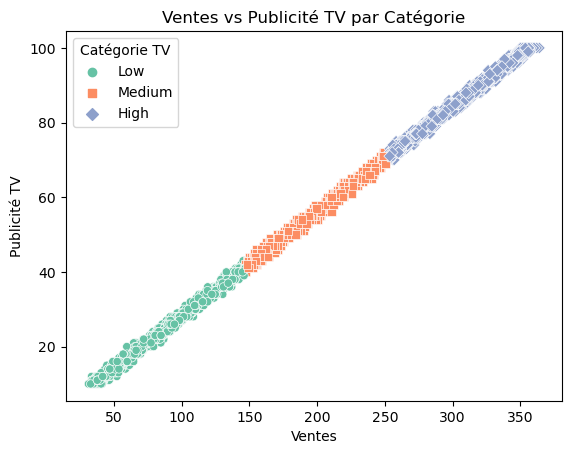

In [29]:
sns.scatterplot(data=data, x='Sales', y='TV', hue='Tv', style='Tv', palette='Set2', markers=['o', 's', 'D'])

plt.title('Ventes vs Publicité TV par Catégorie')
plt.xlabel('Ventes')
plt.ylabel('Publicité TV')
plt.legend(title='Catégorie TV')
plt.show()

# **Etape 4: Modélisation**

- **4.1 Régression**

In [30]:
# Define the OLS formula.

ols_formula1 = 'Sales ~   C(Tv)  + Radio'
# Create an OLS model.

OLS1 = ols(formula = ols_formula1, data = data)
# Fit the model.

model = OLS1.fit()

model_results = model.summary()

model_results

print(model_results)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 1.570e+04
Date:                Sat, 21 Sep 2024   Prob (F-statistic):               0.00
Time:                        10:44:15   Log-Likelihood:                -21531.
No. Observations:                4546   AIC:                         4.307e+04
Df Residuals:                    4542   BIC:                         4.309e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         226.5217      2.275     

- **4.2 Vérifier les Hypothèses**

- **4.2.1 Linéarité**

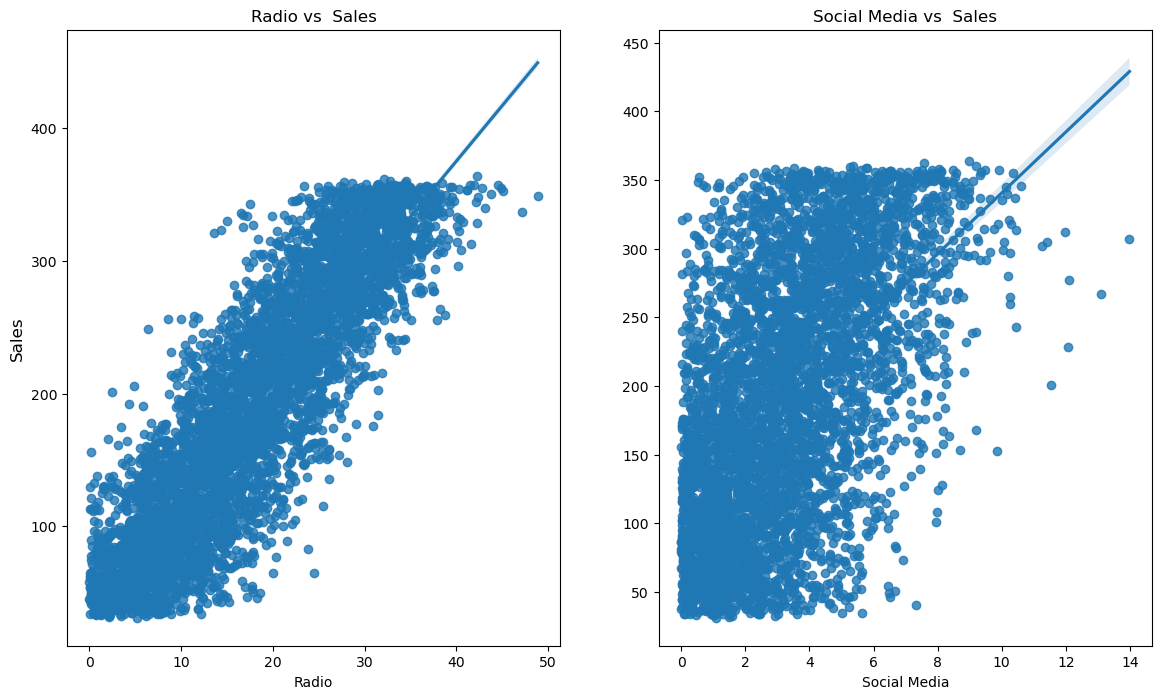

In [31]:
fig, axis=plt.subplots(1,2, figsize=(14,8))
a1=sns.regplot(data=data, x='Radio', y='Sales', ax=axis[0])
a2=sns.regplot(data=data, x='Social_Media', y='Sales', ax=axis[1])
a1.set_xlabel('Radio')
a1.set_ylabel('Sales', fontsize=12)
a1.set_title('Radio vs  Sales')

a2.set_xlabel('Social Media')
a2.set_ylabel(None)
a2.set_title('Social Media vs  Sales')

plt.show()


L'hypothèse de linéarité est respectée pour la variable Radio, car il existe une relation linéaire claire dans le nuage de points entre la radio et les ventes. La variable Social Media n'a pas été incluse dans le modèle de régression linéaire multiple précédent, mais elle semble également avoir une relation linéaire avec les ventes, avec une importe dispersion.

- **4.2.2 L'indépendance des observations**

L'hypothèse d'observations indépendantes stipule que chaque observation dans le jeu de données est indépendante. Étant donné que chaque promotion marketing (c'est-à-dire chaque ligne) est indépendante les unes des autres, cette hypothèse d'indépendance n'est pas violée.

- **4.2.3 La normalité des residus**

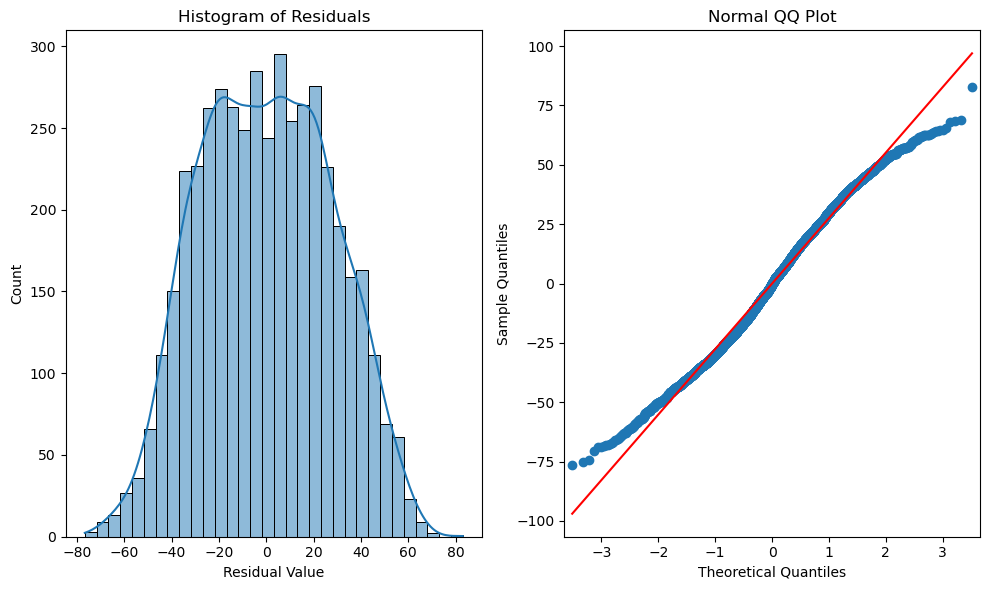

In [32]:
residual=model.resid

fig, axis=plt.subplots(1,2, figsize=(10,6))
a1=sns.histplot(residual, ax=axis[0], kde=True)


a1.set_xlabel('Residual Value')
a1.set_title('Histogram of Residuals')

a2=sm.qqplot(residual, line='s', ax=axis[1])
axis[1].set_title('Normal QQ Plot')

plt.tight_layout()
plt.show()


- **4.2.3 l'Homoscédasticité**

Cet hypothèse stipule que la variance des résidus doit être constante à travers toutes les valeurs prédites.

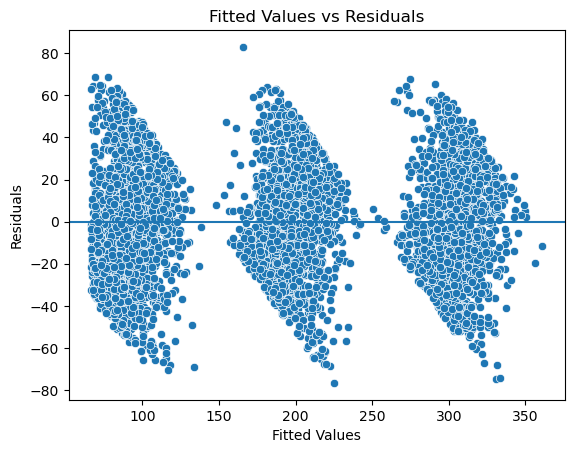

In [33]:
fig=sns.scatterplot(x=model.fittedvalues, y=model.resid)

fig.set_xlabel('Fitted Values')
fig.set_ylabel('Residuals')

fig.set_title('Fitted Values vs Residuals')

fig.axhline(0)

plt.show()

Les valeurs ajustées sont regroupées en trois catégories, car la variable catégorielle domine dans ce modèle, ce qui signifie que la télévision est le principal facteur déterminant des ventes. Cependant, la variance des valeurs ajustées est distribuée de manière similaire, ce qui valide que l'hypothèse est respectée.

- **4.2.5  La non-multicolinéarité**

L'hypothèse de non-multicolinéarité stipule qu'aucune paire de variables indépendantes (Xi et Xj) ne doit être fortement corrélée entre elles.

Deux méthodes courantes pour vérifier la multicolinéarité ont été utilisées :

La détermination par Nuages de Points : Tracer des nuages de points pour montrer la relation entre chaque paire de variables indépendantes. Cela permet de visualiser les corrélations éventuelles entre les variables.

Utiliser la Variance Inflation Factor (VIF) : Calculer le VIF pour chaque variable indépendante. Une VIF élevée indique généralement une multicolinéarité problématique, suggérant que la variable est fortement corrélée avec d'autres variables du modèle.

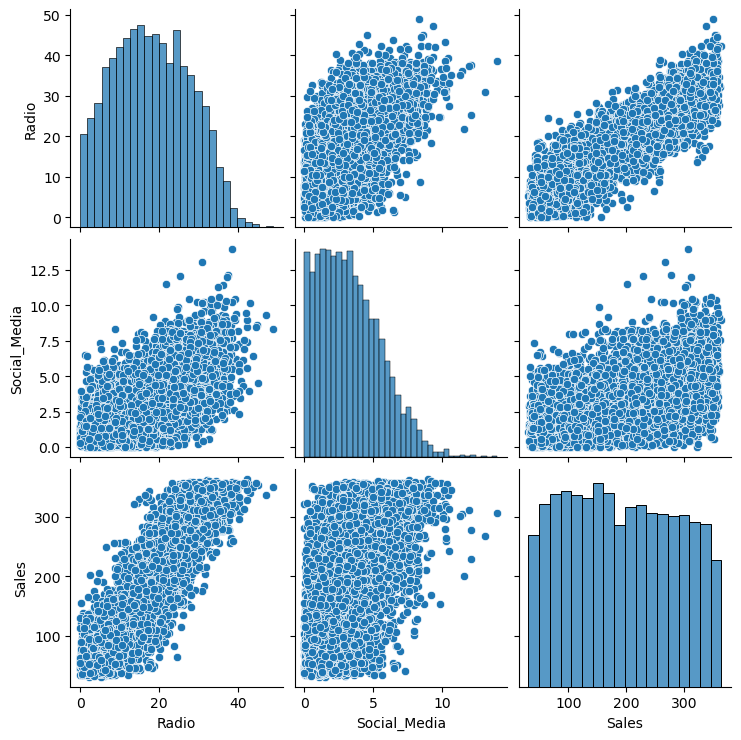

In [34]:
sns.pairplot(data.drop(columns=['TV']))

In [35]:
# Calculate the Variance Inflation Factor (VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X=data[['Radio', 'Social_Media']]

vif=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

df_vif

,VIF
Radio,4.927036
Social_Media,4.927036



Le modèle utilisé n'a qu'une seule variable indépendante continue, ce qui signifie qu'il n'y a pas de problèmes de multicolinéarité. Cependant, si on utilisait dans le modèle à la fois la radio et les réseaux sociaux comme prédicteurs, cela entraînerait une relation linéaire modérée entre la radio et les réseaux sociaux, ce qui violerait l'hypothèse de non-multicolinéarité.

De plus, le facteur d'inflation de la variance (VIF) pour chaque variable, lorsqu'elles sont toutes deux incluses dans le modèle, est de 4,92, ce qui indique une forte multicolinéarité. Cela suggère que la présence simultanée de ces deux variables pourrait compromettre la stabilité et l'interprétabilité des coefficients du modèle.

# **Etape 5: Analyser les Résultats**

In [36]:
print(model_results)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 1.570e+04
Date:                Sat, 21 Sep 2024   Prob (F-statistic):               0.00
Time:                        10:44:15   Log-Likelihood:                -21531.
No. Observations:                4546   AIC:                         4.307e+04
Df Residuals:                    4542   BIC:                         4.309e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         226.5217      2.275     

- **Coefficients**

Les coefficients bêta  permettent d'estimer l'ampleur et la direction (positive ou négative) de l'effet de chaque variable indépendante sur la variable dépendante.

_Modèle de Ventes_

L'équation du modèle de ventes est la suivante :

$$Sales = 218.5261 - 154.2971 * TV_Low - 75.3120 * TV_Medium + 2.9669 * X_Radio$$

_Description des Variables_
- **TV_Low** : Variable catégorielle TV Basse
- **TV_Medium** : Variable catégorielle TV Moyenne
- **Radio** : Variable radio

La catégorie par défaut de la variable TV pour le modèle est "High", car il existe des coefficients pour les deux autres catégories de télévision, "Medium" et "Low". Comme les coefficients des catégories Medium et Low sont négatifs, cela signifie que la moyenne des ventes est inférieure pour les catégories Medium ou Low par rapport à la catégorie High lorsque la radio est au même niveau.

Par exemple: le modèle prédit qu'une promotion TV Low est en moyenne inférieure de 154,2971 par rapport à une promotion TV High, étant donné la même promotion radio. Le coefficient pour la radio est positif, confirmant la relation linéaire positive observée précédemment lors de l'analyse exploratoire des données.

- **Significativité Statistique**

La p-value pour tous les coefficients est de 0,000, ce qui signifie que tous les coefficients sont statistiquement significatifs à p = 0,05. 

Par exemple: il y a 95 % de chances que l'intervalle [−163,504, −156.532] contienne le vrai paramètre de la pente de β_TV Low, qui est la différence estimée dans les ventes de promotions lorsque l'on choisit une promotion TV Low au lieu d'une promotion TV High.

# **Etape 6: Recommandation**

L'analyse indique que le budget alloué à la télévision est le facteur principal influençant les ventes, suivi par celui dédié à la radio. En revanche, les investissements dans les réseaux sociaux et les influenceurs semblent avoir un impact limité.

Il est recommandé à l'entreprise:

- d'augmenter le budget promotionnel destiné à la télévision;
- investir dans des campagnes radio pour stimuler les ventes; 
- reconsidérer la stratégie concernant les réseaux sociaux.

**NB**

L'intégration d'autres variables, telles que l'emplacement de la campagne marketing ou la période de l'année, pourrait accroître la précision du modèle. Ces ajustements permettraient d'obtenir une meilleure compréhension des facteurs influençant les ventes et d'optimiser les stratégies de marketing.

**References** Saragih, H.S. (2020). [Dummy Marketing and Sales Data.](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data)

$$ **MERCI!** %%